# Lab 14: Random numbers and Monte Carlo integration

In this lab, we will look at integration using so-called *Monte Carlo* methods, which rely on random (or *pseudorandom*) numbers. In the process, we’ll discover more about how to generate these numbers and what else they can be used for.

Reference:  Computational Physics, (2012) by Mark Newman contains a good discussion of pseudo random numbers and Monte Carlo methods.  Some of the material in this lab comes from this excellent book.

## Pseudorandom numbers
A simple pseudorandom number generator follows the formula: 

$$r_{i+1} = (ar_i + c) \mod M,$$ 

where $a$, $c$, and $M$ are specified integer constants. This gives integers between 0 and $M-1$. 

This is called a *linear congruential random number generator*.  It generates a string of apparently random positive integers, by iterating the equation over and over.

Clearly you need an initial value to begin iterating on the sequence.  This value $r_0$ is called the *'seed'* of the pseudorandom number generator. 

**Write a programme to generate random integers using the relation above**

Note:  In Python, the modulo (“remainder”) operator is `%` (you can always open a new cell and try typing a few examples to remind yourself of how this works. e.g., 11%3 ...etc).

Start by using the values $M = 2^6$, $c = 1$, $a = 57$, and begin iterating with a seed of $r_0 = 10$.

**Determine the period of this generator:** that is, how many values does it generate before returning to the starting point $r = 10$, or initial seed value?

In [2]:
M, c, a, r0 = 2**6, 1, 57, 10
def r_n(r0):
    i = 1
    r = (a*r0 + c)%M
    while r != r0:
        i = i + 1
        r = ((a*r) + c)%M
        #print(r)
    print(i)
r_n(r0)

64


**Using your code above explore some of these characteristics of this pseudorandom number generator:**
- Are the numbers in the sequence truly random or deterministic?  If you run it again with the same choices of constants and seed, you will get the same list of numbers?  
- What happens to the sequence of numbers if you start with a different initial seed $r_0$?  Explore using successive values in the sequence as $r_0$.  What happens?
- The chosen values of the constants $a$, $c$, and $M$ matter. What is the maximum value in the sequence of integers?  How is it limited by the choice of constants?



In [3]:
#The numbers in this sequence are deterministic and not random. And, after running this multiple times with the same values generate the same list of values.

In [4]:
r0 = 31
r_n(r0) #We get the same amount of steps at 64 

64


In [5]:
#The maximum values of the sequence of integers is M - 1 and is mostly limited by M.


Now, initiate your sequence with the values $M = 2^8$, $c = 1$, $a = 57$, and begin iterating with $r_0 = 10$.

**Again, determine the period of this generator:** that is, how many values does it generate before returning to the starting point $r = 10$, or initial seed value?  Is it what you expect?

Note - sometimes we would prefer to have random floating-point numbers rather than integers.  To get a list of floating-point values we can divide the values of $r$ by $M$ to get a sequence of floating-point numbers in the range $[0,1)$. 

In [6]:
M, c, a, r0 = 2**8, 1, 57, 10
r_n(r0) # 256 steps, giving a wider range of possible values allows for greater steps to be made and it does meet my expectations.

256


So it generates 256 values before returning to r=10,  The period of the sequence is $M=2^8 = 256$

**Plot successive random numbers in your sequence as pairs:**  that is $(x,y) = (r_i,r_{i+1})$ plotted as points.  Or $(r_0, r_1)$, $(r_2, r_3)$, and so forth.

**Explain why this may not be a suitable random number generator for serious use.**



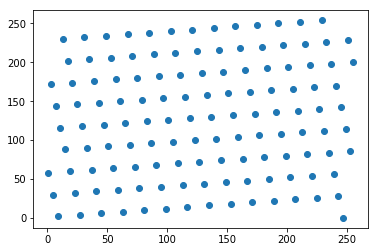

In [7]:
from pylab import figure, plot as plt

values = []
M, c, a, r0 = 2**8, 1, 57, 10
def r_n_plot(r0):
    i = 1
    r = (a*r0 + c)%M
    values.append(r)
    while r != r0:
        i = i + 1
        r = ((a*r) + c)%M
        values.append(r)

r_n_plot(r0)
#print(values)
x = values[0::2]
y = values[1::2]
#print(y)
plt(x,y, 'o')

The 'random' numbers are clearly layed out on a grid with even spacing.  This is a regular, and certainly not close to random arrangment of numbers.   Also, it has a very short period and would 'run out' of numbers after just 256 values.


**Make another version of the plot** this time using the more realistic values $M = 2^{48}$, $c = 11$, $a = 25 214 903 917$.

Plot the first 128 pairs of points (or 256 values of the sequence)

Is the choice of sequence constants important for the *randomness* of the sequence?

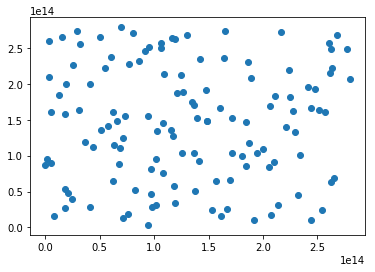

In [8]:
M, c, a, r0 = 2**48, 11, 25214903917, 10
values2 = []
def r_n_plot2(r0):
    i = 1
    r = (a*r0 + c)%M
    values2.append(r)
    while r != r0:
        i = i + 1
        r = ((a*r) + c)%M
        values2.append(r)
        if i == 256:
            return
r_n_plot2(r0)
x2 = values2[0::2]
y2 = values2[1::2]
#print(values2)
plt(x2,y2,'o') # The choice of sequence constant is not important for the 'randomness' of the sequence, it just allows for a greater number of steps to be made

## Random Number Generators in Numpy ##

From the above you can see that one needs to be a little careful about the algorithm and choice of constants to produce effectively random numbers.  Generally speaking we use standard library routines to for these purposes that have been rigourously tested, rather than writing our own.

You can import functions from the `numpy` module for these purposes.  

`np.random.random_sample` - creates arrays of random floats  on the interval of $[0,1)$.

`np.random.seed` - sets the seed of the random number sequence.

Load these functions into the namespace and have a read through the documentation to see how to use them.  We will use these later in this lab.

In [9]:
from numpy.random import random_sample, seed

In [10]:
?random_sample


In [11]:
?seed


**Read the documentation and try creating a few arrays of random numbers by exploring these functions below.**  Try using different seeds and numbers of values.

In [12]:
seed(4)
random_sample(10)

array([0.96702984, 0.54723225, 0.97268436, 0.71481599, 0.69772882,
       0.2160895 , 0.97627445, 0.00623026, 0.25298236, 0.43479153])

▶ **CHECKPOINT 1**

## Interlude: more on `array`s

In practice, it’s almost always best to use pseudorandom number generators written by experts. Our pseudorandom numbers will be generated using functions from the `numpy.random` module, which returns these numbers as `array`s. We’ll need two useful methods of this data type.

First, the `reshape` method changes the shape of an array, while keeping the individual elements and their order:

In [13]:
from numpy import array
x = array([1,2,3,4,5,6])
y = x.reshape(3,2)
print(y)

[[1 2]
 [3 4]
 [5 6]]


A very useful feature of `reshape` is that you can make one argument equal to -1; then that dimension will simply be whatever size is necessary to accommodate the rest of the array. For instance, here we say that we want two columns and however many rows are needed:

In [14]:
x = array([1,2,3,4,5,6])
y = x.reshape(-1,2)
print(y)

[[1 2]
 [3 4]
 [5 6]]


Second, the `sum` method by default adds up every number in an array, but can be restricted to do so along a particular axis:

In [15]:
print(y)
print("Sum all:")
print(y.sum())

[[1 2]
 [3 4]
 [5 6]]
Sum all:
21


In [16]:
print(y)
print("Sum along columns:")
print(y.sum(axis=0))

[[1 2]
 [3 4]
 [5 6]]
Sum along columns:
[ 9 12]


In [17]:
print(y)
print("Sum along rows:")
print(y.sum(axis=1))

[[1 2]
 [3 4]
 [5 6]]
Sum along rows:
[ 3  7 11]


## Monte Carlo integration

Random numbers can be used to estimate integrals that are difficult to evaluate via other methods.  These methods are often referred to as *Monte Carlo* methods after the famous casino.  

Say we want to evaluate the integral
$$
I = \int_a^bf(x)dx.
$$
The average of $f(x)$ over the range  from $a$ to $b$ is then by definition
$$
\langle f \rangle = \frac{1}{b-a} \int_a^b f(x) dx = \frac{I}{b-a}
$$
or alternatively
$$
I = (b-a) \langle f \rangle.
$$

So, if we can compute $\langle f \rangle$, then we can evaluate the integral!


We then estimate the mean value of the function by sampling $x$ at a series of points ($x_i$ where $i=1,\ldots,N $) and then taking the average.  That is $\langle f \rangle \simeq \frac{1}{N} \sum_{i=1}^N f(x_i)$.

Then the integral is simply approximated as
$$
I \simeq \frac{b-a}{N}\sum_{i=1}^N f(x_i)
$$

Since we've calculated the value of the integral from the mean value,  the error in the method is the standard deviation of the mean.  Or,
$$
\sigma = (b-a) \frac{\sqrt{\sqrt{\langle f^2\rangle}-\sqrt{\langle f\rangle}}}{\sqrt{N}}
$$
and the error is proportional to $1/\sqrt{N}$.  If we think of the *effective step size* of this method $h\sim (b-a)/N$ then the error is propotional to $h^{1/2}$.  *NOT GOOD*, and much worse than Trapezoid rule $\mathcal{O}(h^2)$, or Simpson's rule $\mathcal{O}(h^4)$.

So we use this approach only when other methods run into problems.  Two examples include pathological functions and integrals in high numbers of dimensions (applications include,   integrating wavefunctions for each electron of an atom with many electrons, as well as calculations in statistical mechanics).


### A Simple Example ###

We’ll start by evaluating a very simple integral, to which we know the answer:
$$
\int_0^1x^2\,\mathrm dx  = \tfrac13.
$$

The way to do this by the Monte Carlo method is to take random points inside the integration boundaries, here $0\leq x \leq 1$. We then take the average of the function to be integrated, evaluated at each of these points.


Use the `random_sample()` function to **generate 100 numbers between 0 and 1**. *Hint:* you will need to use the `size` argument; consult the documentation if necessary to see how this works.

In [18]:
import numpy as np
random_sample
random_input = random_sample((100))

Since we are integrating $x^2$, **square these numbers**. Then **calculate the average**. How close is your answer to the expected value?

In [19]:
random_input = random_sample((100))
random_xpower2 = random_input * random_input
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)
mean(random_xpower2)
# Very close to the value given in the above text, 1/3

0.35684038676812896

▶ **CHECKPOINT 2**

### Integrals in many dimensions ###

The following 21-dimensional integral looks forbidding, but it can be tackled in exactly the same way:
$$
\int_0^1\cdots\int_0^1\big(x_1 + x_2 + x_3 + \cdots + x_{21}\big)^2\,\mathrm dx_1 \dots \mathrm dx_{21}.
$$
Its value turns out to be exactly equal to 112 (this is not such a difficult thing to prove if you would like to have a go!). 

Here the integration boundaries are a hypercube where $x_1$, $x_2$, etc. all take values between 0 and 1. We need to take the average of the function to be integrated, 
$$
f(x_1,x_2,,\ldots,x_{21})=(x_1 + x_2 + x_3 + \cdots + x_{21})^2,
$$ 
evaluated at each of these points.

Then we do this repeatedly to compute an average value of the function $\langle f \rangle$.

**Write a bit of code to evaluate this integral**

There are many ways to do this and you can proceed as you wish.  Below is a recipe that employs reshaping numpy arrays.


The following will compute the value of the 21-dimensional function $f$ ten times.
- Use the `random_sample()` function to **generate 210 numbers between 0 and 1**. 
- Use `reshape` to **change this into an array with 21 columns** (and therefore ten rows), which we will interpret as a set of ten points in 21-dimensional space.

- Use `sum` to **calculate $(x_1 + x_2 + x_3 + \cdots + x_{21})^2$ at each point**: your result should be an array of 10 values, one for each point.

- **Calculate the average of this array**, which is our Monte Carlo estimate of the integral.  You can use `np.mean()` to find the mean of an array (look at the docs).

In [20]:
random_input2 = random_sample(210)
#print(sum(random_input2))
random_input2 = random_input2.reshape(-1,21)
aggregate = []
for i in random_input2:
    aggregate.append(sum(i)*sum(i))
    
mean = np.mean(aggregate)
#sum(random_x2_power2)
#? Not even close
print(mean)

118.50371396668024


**Repeat your calculation** with more data points. **Plot the relative error in the integral** as a function of the number of data points, on a log-log scale. Are your results consistent with the theoretical result that the error should scale with $1/\sqrt{N}$?  

*Note* for large numbers of points ($\gtrsim10^6$) these calculations can take some time. 


10000


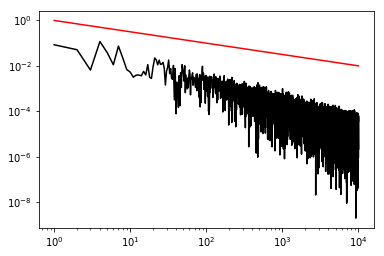

In [25]:
from pylab import loglog, logspace, subplot, xlim
random_input3 = random_sample((210000))
random_input3 = random_input3.reshape(-1,21)
error = []
expected_errors = []
n = 0
for i in random_input3:
    n+=1
    x2 = np.mean(sum(i)*sum(i))
    error.append(abs((112 - x2)/112)/n)
    
for i in range(1,len(random_input3) +1):
    expected_error = 1/np.sqrt(i)
    expected_errors.append(expected_error)
print(n)
loglog(np.linspace(1,len(random_input3), len(random_input3)), error, 'k')
loglog(np.linspace(1,len(random_input3), len(random_input3)), expected_errors, 'r' )


**Evaluate the error** of a calculation with $N=21\times10^5$ (i.e., $10^5$ function evaluations of the 21-dimensional function $f$). If you tried to do a trapezoid rule calculation with approximately the same number of points, where would you end up evaluating the function? Can you see why the Monte Carlo method will almost certainly give a better result?

In [22]:
min(error), max(error)

(3.4642568998098523e-09, 0.08453015300167742)

▶ **CHECKPOINT 3**

(*Extension:* actually evaluate the trapezoid-rule value. You might want to talk to a demonstrator about how to generate the required points; I used the `product` function from the `itertools` module.)

LaTex: alpha**2